# Read and preprocess

To build an algorithm that classifies social media comments into normal or toxic.

https://github.com/yandexdataschool/nlp_course/blob/2020/week02_classification/homework_part1.ipynb

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/ColabNotebooks/DL_for_NLP_HSE/HWs/comments.txt"

data = pd.read_csv(path, sep='\t', index_col=None)

In [ ]:
data

should_ban                                       comment_text
0             0  The picture on the article is not of the actor...
1             1  Its madness. Shes of Chinese heritage, but JAP...
2             1  Fuck You. Why don't you suck a turd out of my ...
3             1  God is dead\r\nI don't mean to startle anyone ...
4             1  THIS USER IS A PLANT FROM BRUCE PERENS AND GRO...
..          ...                                                ...
995           0                rowspan=9 colspan=8|Did Not Qualify
996           0  "== Disputed and under-referenced ==\r\n\r\nI ...
997           0  Why?\r\nWhy does this event have its own page?...
998           0  Que? \r\n\r\nWas this fat fingers? If not,  ca...
999           1  so everytime i reset my modem my ip changes\r\...

[1000 rows x 2 columns]

In [ ]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pattern = re.compile('[~`@#$%^&£*()-=+/\\><{}\[\]!\?,\.;:]')
def remove_symbols(text):
    new_text = re.sub(pattern, '', text)
    return new_text

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    word_tokens = word_tokenize(text)
    text = [i for i in word_tokens if not i in stop_words]
    return text

def preprocessing(text):
    text = remove_symbols(text.lower())
    text = remove_numbers(text)
    text = remove_stopwords(text)
    text = ' '.join(text)
    return text

In [ ]:
clean_text = []

for text_data in data['comment_text']:
    clean = preprocessing(str(text_data))
    clean_text.append(clean)

data['clean_text'] = clean_text

In [ ]:
data

should_ban  ...                                         clean_text
0             0  ...  picture article actor tr knight subject articl...
1             1  ...  madness shes chinese heritage japanese thats i...
2             1  ...  fuck n't suck turd asshole think handle dumbfu...
3             1  ...  god dead n't mean startle anyone god dead worr...
4             1  ...  user plant bruce perens groklaw revoke rights ...
..          ...  ...                                                ...
995           0  ...                        rowspan colspan|did qualify
996           0  ...  `` disputed underreferenced applied two tags g...
997           0  ...                                         event page
998           0  ...                     que fat fingers please explain
999           1  ...  everytime reset modem ip changes fuck petty se...

[1000 rows x 3 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
data['should_ban'] = LE.fit_transform(data['should_ban'])

In [ ]:
import spacy
spacy_model = spacy.load('en_core_web_sm')

In [ ]:
tokens = []
lemmas = []

for doc in spacy_model.pipe(data['clean_text'].astype('unicode').values, batch_size=50,
                        n_threads=3):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemmas.append([n.lemma_ for n in doc])
    else:
        tokens.append('UNK')
        lemmas.append('UNK')

tokens_str = [' '.join(map(str, el)) for el in tokens]
lemmas_str = [' '.join(map(str, el)) for el in lemmas]

data['tokens'] = tokens_str
data['lemmas'] = lemmas_str

print(type(tokens_str))

<class 'list'>


In [ ]:
data

should_ban  ...                                             lemmas
0             0  ...  picture article actor tr knight subject articl...
1             1  ...  madness -PRON- s chinese heritage japanese tha...
2             1  ...  fuck n't suck turd asshole think handle dumbfu...
3             1  ...  god dead n't mean startle anyone god dead worr...
4             1  ...  user plant bruce peren groklaw revoke rights b...
..          ...  ...                                                ...
995           0  ...                        rowspan colspan|did qualify
996           0  ...  ` ` dispute underreferenced apply two tag gamu...
997           0  ...                                         event page
998           0  ...                      que fat finger please explain
999           1  ...  everytime reset modem ip change fuck petty sex...

[1000 rows x 5 columns]

In [ ]:
print(data.lemmas.map(lambda x: len(x)).max())

4616


In [ ]:
# shuffling data

data = data.sample(frac=1) 

In [ ]:
from sklearn.model_selection import train_test_split

X = data['lemmas']
y = data['should_ban']

x_train_lem, x_nottrain_lem, y_train, y_nottrain = train_test_split(X, y, test_size = 0.3)
x_val_lem, x_test_lem, y_val, y_test = train_test_split(x_nottrain_lem, y_nottrain, test_size = 0.4, random_state = 412)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

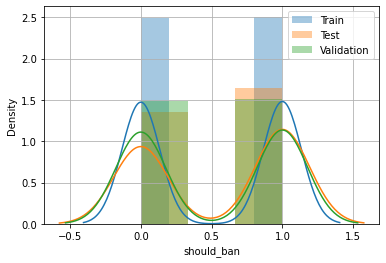

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(y_train, label='Train')
sns.distplot(y_test, label='Test')
sns.distplot(y_val, label ='Validation')

plt.legend()
plt.grid()

plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5491)
tokenizer.fit_on_texts(x_train_lem)

x_for_train = tokenizer.texts_to_sequences(x_train_lem)
x_for_test = tokenizer.texts_to_sequences(x_test_lem)
x_for_val = tokenizer.texts_to_sequences(x_val_lem)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

#print(x_train_lem[0])
#print(x_for_train[0])

In [ ]:
vocab_size

5318

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 4616

x_for_train_padded = pad_sequences(x_for_train, padding='post', maxlen=maxlen)
x_for_test_padded = pad_sequences(x_for_test, padding='post', maxlen=maxlen)
x_for_val_padded = pad_sequences(x_for_val, padding='post', maxlen=maxlen)

print(x_for_train_padded[0, :])

[ 25  41 509 ...   0   0   0]


In [ ]:
x_for_train_padded.shape

(700, 4616)

In [ ]:
y_train.shape

(700,)

# Models

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D
from keras.layers.pooling import GlobalMaxPooling1D
from keras.layers.recurrent import LSTM
from tensorflow.keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation

embedding_dim = 4616

## Random CNN

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 4616)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 4616, 4616)        23518520  
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4616, 256)         1181952   
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 256)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 24,700,729
Trainable params: 24,700,729
Non-trainable params: 0
_______________________________________________

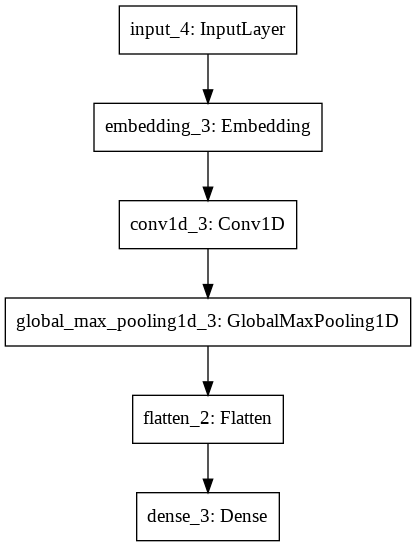

In [ ]:
input = Input((embedding_dim,))
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)(input)
conv1 = Conv1D(256, kernel_size=1, activation='sigmoid')(embedding)
pool1 = GlobalMaxPooling1D()(conv1)
flat = Flatten()(pool1)
output = Dense(1, activation='relu')(flat)
cnn_model_1 = Model(inputs=input, outputs=output)

# summarize layers
print(cnn_model_1.summary())
# plot graph
plot_model(cnn_model_1, to_file='cnn.png')

In [ ]:
cnn_model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_history_1 = cnn_model_1.fit(x_for_train_padded, y_train,
                    epochs=10,
                    steps_per_epoch=5,
                    validation_data=(x_for_val_padded, y_val),
                    batch_size=10)

Epoch 1/10
5/5 [==============================] - 67s 15s/step - loss: 0.7199 - accuracy: 0.5894 - val_loss: 1.6022 - val_accuracy: 0.5333
Epoch 2/10
5/5 [==============================] - 71s 16s/step - loss: 0.8809 - accuracy: 0.6061 - val_loss: 0.6590 - val_accuracy: 0.5778
Epoch 3/10
5/5 [==============================] - 67s 15s/step - loss: 0.6388 - accuracy: 0.5989 - val_loss: 0.9091 - val_accuracy: 0.4667
Epoch 4/10
5/5 [==============================] - 66s 15s/step - loss: 0.7875 - accuracy: 0.5197 - val_loss: 0.6163 - val_accuracy: 0.6278
Epoch 5/10
5/5 [==============================] - 67s 15s/step - loss: 0.5136 - accuracy: 0.6808 - val_loss: 0.5603 - val_accuracy: 0.6833
Epoch 6/10
5/5 [==============================] - 66s 15s/step - loss: 0.6191 - accuracy: 0.6753 - val_loss: 0.5438 - val_accuracy: 0.6944
Epoch 7/10
5/5 [==============================] - 66s 15s/step - loss: 0.4699 - accuracy: 0.7617 - val_loss: 0.4964 - val_accuracy: 0.7611
Epoch 8/10
5/5 [===========

In [ ]:
print(cnn_history_1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


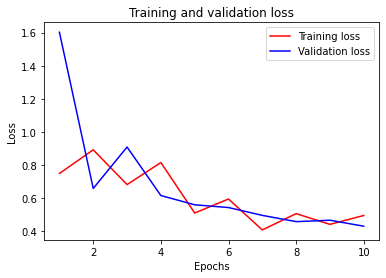

In [ ]:
history_dict = cnn_history_1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(cnn_history_1.epoch) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

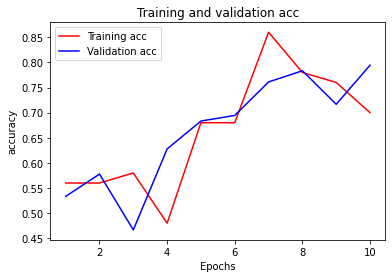

In [ ]:
history_dict = cnn_history_1.history
root_mean_squared_error = history_dict['accuracy']
val_root_mean_squared_error = history_dict['val_accuracy']

epochs = range(1, len(cnn_history_1.epoch) + 1)

plt.plot(epochs, root_mean_squared_error, 'r', label='Training acc')
plt.plot(epochs, val_root_mean_squared_error, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

Возможно, стоит уменьшить число эпох. А еще значения метрик скачут в середине графика: возможно, переобучение. Гугл говорит, что это может быть из-за 1) некорректного распределения данных между train и validation (в валидацию попали слишком "простые" случаи) 2) нет дропаутов 3) можно добавить больше фильтров и вынести функции активации отдельными слоями. Вот с п.2 и 3 попробуем разобраться.

## CNN Dropout

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 4616)]            0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 4616, 4616)        23518520  
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 4616, 256)         1181952   
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 256)               0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257 

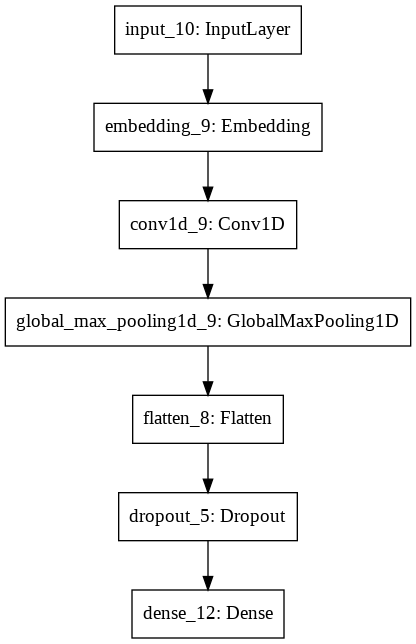

In [ ]:
embedding_dim = 4616

input = Input((embedding_dim,))
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)(input)
conv1 = Conv1D(256, kernel_size=1, activation='sigmoid')(embedding)
pool1 = GlobalMaxPooling1D()(conv1)
flat = Flatten()(pool1)
dropout = Dropout(0.2)(flat)
output = Dense(1, activation='relu')(dropout)
cnn_model_2 = Model(inputs=input, outputs=output)

# summarize layers
print(cnn_model_2.summary())
# plot graph
plot_model(cnn_model_2, to_file='cnn.png')

In [ ]:
cnn_model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_history_2 = cnn_model_2.fit(x_for_train_padded, y_train,
                    epochs=5,
                    steps_per_epoch=5,
                    validation_data=(x_for_val_padded, y_val),
                    batch_size=10)

Epoch 1/5
5/5 [==============================] - 67s 15s/step - loss: 1.3669 - accuracy: 0.7878 - val_loss: 0.8521 - val_accuracy: 0.6722
Epoch 2/5
5/5 [==============================] - 66s 15s/step - loss: 0.9465 - accuracy: 0.7067 - val_loss: 0.9884 - val_accuracy: 0.6056
Epoch 3/5
5/5 [==============================] - 67s 15s/step - loss: 2.2605 - accuracy: 0.5603 - val_loss: 0.8367 - val_accuracy: 0.6389
Epoch 4/5
5/5 [==============================] - 66s 15s/step - loss: 0.6256 - accuracy: 0.7464 - val_loss: 0.5535 - val_accuracy: 0.6722
Epoch 5/5
5/5 [==============================] - 66s 15s/step - loss: 2.2138 - accuracy: 0.6908 - val_loss: 0.6859 - val_accuracy: 0.7556


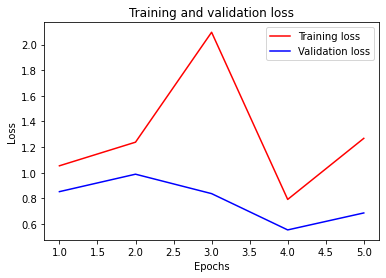

In [ ]:
history_dict = cnn_history_2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(cnn_history_2.epoch) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

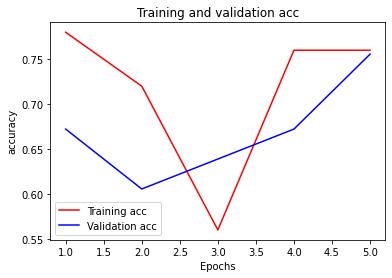

In [ ]:
history_dict = cnn_history_2.history
root_mean_squared_error = history_dict['accuracy']
val_root_mean_squared_error = history_dict['val_accuracy']

epochs = range(1, len(cnn_history_2.epoch) + 1)

plt.plot(epochs, root_mean_squared_error, 'r', label='Training acc')
plt.plot(epochs, val_root_mean_squared_error, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

Модель скачет, нехорошо. И эпох маловато. Еще поэкспериментируем (кстати, BatchNormalization пыталась добавлять по-всякому, ситуацию не спасло + в обсуждениях на stackoverflow часто встречала, что это спорная штука и нет единого мнения, добавлять его до или после линейного слоя)

## CNN more filters

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 4616)]            0         
_________________________________________________________________
embedding_18 (Embedding)     (None, 4616, 4616)        23827792  
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 4616, 380)         1754460   
_________________________________________________________________
global_max_pooling1d_17 (Glo (None, 380)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 380)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 64)                24384     
_________________________________________________________________
activation_14 (Activation)   (None, 64)                0  

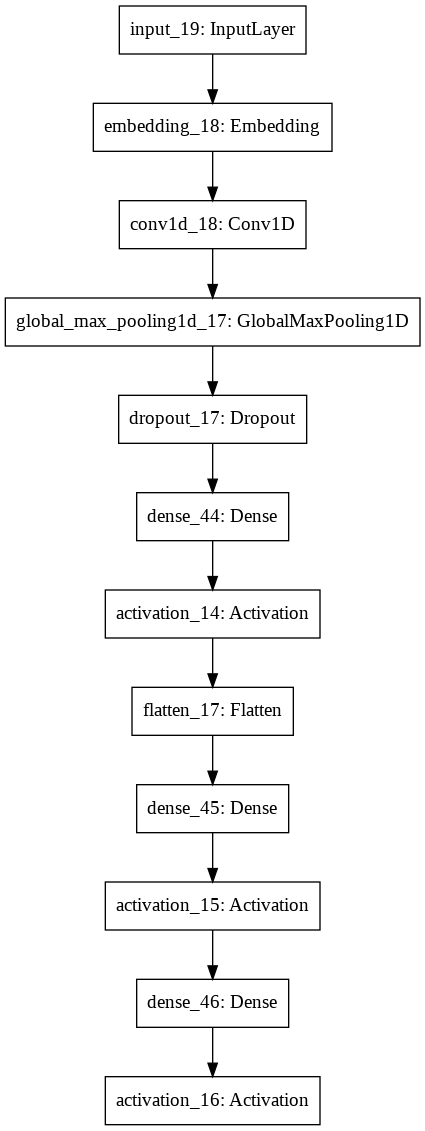

In [ ]:
input = Input(embedding_dim,)
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)(input)
conv1 = Conv1D(380, kernel_size=1, activation='relu')(embedding)
pool1 = GlobalMaxPooling1D()(conv1)
dropout = Dropout(0.2)(pool1)
dense1 = Dense(64)(dropout)
act1 = Activation('relu')(dense1)
flat = Flatten()(act1)
dense2 = Dense(16)(flat)
act2 = Activation('relu')(dense2)
dense3 = Dense(1)(act2)
act3 = Activation('sigmoid')(dense3)
cnn_model_3 = Model(inputs=input, outputs=act3)

# summarize layers
print(cnn_model_3.summary())
# plot graph
plot_model(cnn_model_3, to_file='cnn.png')

In [ ]:
cnn_model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_history_3 = cnn_model_3.fit(x_for_train_padded, y_train,
                    epochs=7,
                    steps_per_epoch=5,
                    validation_data=(x_for_val_padded, y_val),
                    batch_size=20)

Epoch 1/7
5/5 [==============================] - 143s 30s/step - loss: 0.6838 - accuracy: 0.5706 - val_loss: 0.6381 - val_accuracy: 0.6111
Epoch 2/7
5/5 [==============================] - 138s 30s/step - loss: 0.6775 - accuracy: 0.5808 - val_loss: 0.6385 - val_accuracy: 0.6167
Epoch 3/7
5/5 [==============================] - 138s 30s/step - loss: 0.6184 - accuracy: 0.6363 - val_loss: 0.5437 - val_accuracy: 0.7222
Epoch 4/7
5/5 [==============================] - 146s 32s/step - loss: 0.6054 - accuracy: 0.6407 - val_loss: 0.4994 - val_accuracy: 0.7667
Epoch 5/7
5/5 [==============================] - 140s 30s/step - loss: 0.5097 - accuracy: 0.7694 - val_loss: 0.4696 - val_accuracy: 0.8111
Epoch 6/7
5/5 [==============================] - 138s 30s/step - loss: 0.5549 - accuracy: 0.6801 - val_loss: 0.4227 - val_accuracy: 0.8333
Epoch 7/7
5/5 [==============================] - 138s 30s/step - loss: 0.5395 - accuracy: 0.6950 - val_loss: 0.3899 - val_accuracy: 0.8333


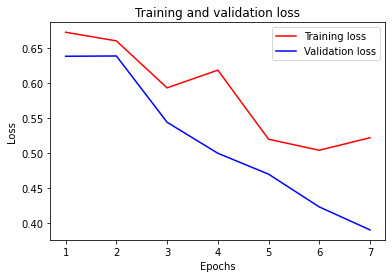

In [ ]:
history_dict = cnn_history_3.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(cnn_history_3.epoch) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

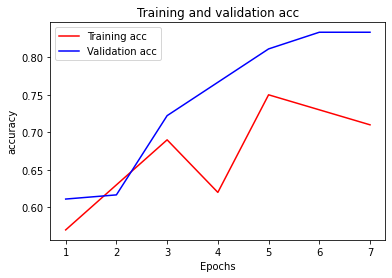

In [ ]:
history_dict = cnn_history_3.history
root_mean_squared_error = history_dict['accuracy']
val_root_mean_squared_error = history_dict['val_accuracy']

epochs = range(1, len(cnn_history_3.epoch) + 1)

plt.plot(epochs, root_mean_squared_error, 'r', label='Training acc')
plt.plot(epochs, val_root_mean_squared_error, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

Ну вот, кажется, выжали из модели все, что можно: качество перестало расти.

## CNN more convolutions

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4616)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 4616, 4616)        24547888  
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 4616, 380)         1754460   
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2308, 380)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2308, 380)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2308, 140)         53340     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 140)               0   

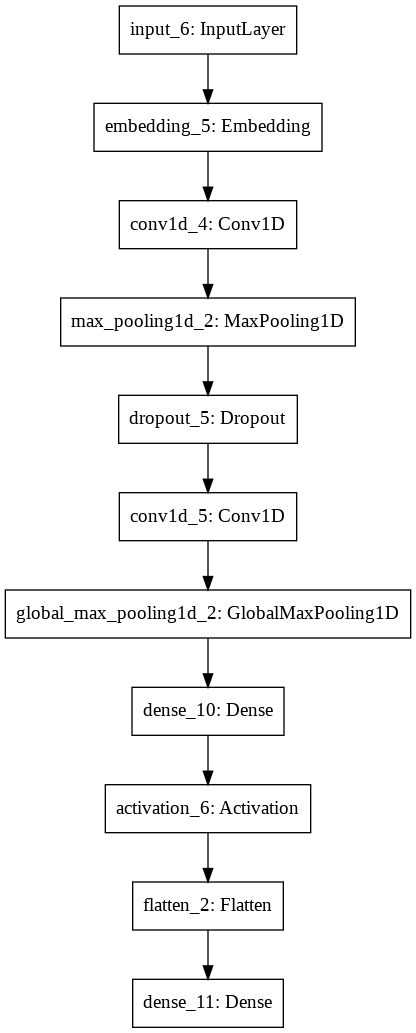

In [ ]:
input = Input(embedding_dim,)
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)(input)
conv1 = Conv1D(380, kernel_size=1, activation='relu')(embedding)
pool1 = MaxPooling1D()(conv1)
dropout = Dropout(0.2)(pool1)
conv2 = Conv1D(140,  kernel_size=1, activation='relu')(dropout)
pool2 = GlobalMaxPooling1D()(conv2)
dense1 = Dense(32)(pool2)
act1 = Activation('relu')(dense1)
flat = Flatten()(act1)
dense2 = Dense(1, activation='sigmoid')(flat)
cnn_model_4 = Model(inputs=input, outputs=dense2)

# summarize layers
print(cnn_model_4.summary())
# plot graph
plot_model(cnn_model_4, to_file='cnn.png')

In [ ]:
cnn_model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn_history_4 = cnn_model_4.fit(x_for_train_padded, y_train,
                    epochs=7,
                    steps_per_epoch=5,
                    validation_data=(x_for_val_padded, y_val),
                    batch_size=20)

Epoch 1/7
5/5 [==============================] - 135s 29s/step - loss: 0.7034 - accuracy: 0.5157 - val_loss: 0.6876 - val_accuracy: 0.5000
Epoch 2/7
5/5 [==============================] - 134s 29s/step - loss: 0.6894 - accuracy: 0.4783 - val_loss: 0.6586 - val_accuracy: 0.5667
Epoch 3/7
5/5 [==============================] - 145s 32s/step - loss: 0.6533 - accuracy: 0.6503 - val_loss: 0.6193 - val_accuracy: 0.7111
Epoch 4/7
5/5 [==============================] - 134s 29s/step - loss: 0.6444 - accuracy: 0.6811 - val_loss: 0.5898 - val_accuracy: 0.7111
Epoch 5/7
5/5 [==============================] - 134s 29s/step - loss: 0.5668 - accuracy: 0.7083 - val_loss: 0.5581 - val_accuracy: 0.7611
Epoch 6/7
5/5 [==============================] - 134s 29s/step - loss: 0.5296 - accuracy: 0.7382 - val_loss: 0.5255 - val_accuracy: 0.7500
Epoch 7/7
5/5 [==============================] - 137s 30s/step - loss: 0.5300 - accuracy: 0.6318 - val_loss: 0.5104 - val_accuracy: 0.7556


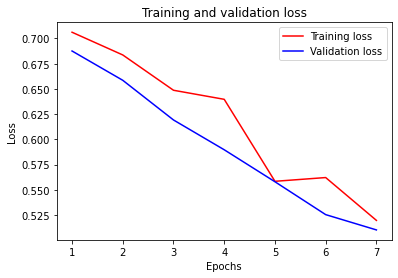

In [ ]:
history_dict = cnn_history_4.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(cnn_history_4.epoch) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

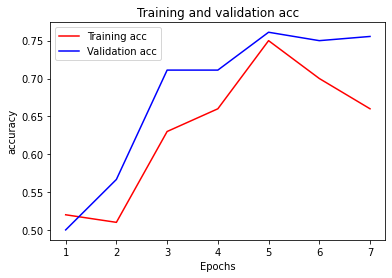

In [ ]:
history_dict = cnn_history_4.history
root_mean_squared_error = history_dict['accuracy']
val_root_mean_squared_error = history_dict['val_accuracy']

epochs = range(1, len(cnn_history_4.epoch) + 1)

plt.plot(epochs, root_mean_squared_error, 'r', label='Training acc')
plt.plot(epochs, val_root_mean_squared_error, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

Лучшей по качеству оказалась третья модель, 0.83. Ну ладно, переходим к рекуррентной сетке.

## Random RNN

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 4616)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 4616, 4616)        24547888  
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 4616, 64)          299584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 4616, 64)          0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 4616, 32)          3104      
_________________________________________________________________
dense_3 (Dense)              (None, 4616, 1)           33        
Total params: 24,850,609
Trainable params: 24,850,609
Non-trainable params: 0
_______________________________________________

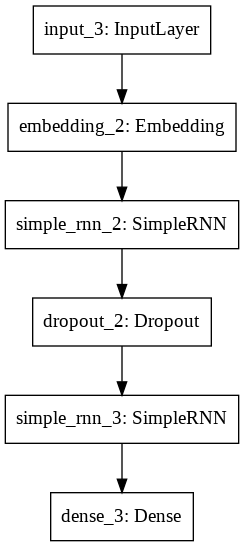

In [ ]:
input = Input(embedding_dim,)
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)(input)
recurrent1 = SimpleRNN(64, return_sequences=True)(embedding)
dropout = Dropout(0.2)(recurrent1)
recurrent2 = SimpleRNN(32, return_sequences=True)(dropout)
output = Dense(1, activation='sigmoid')(recurrent2)
rnn_model_1 = Model(inputs=input, outputs=output)

# summarize layers
print(rnn_model_1.summary())
# plot graph
plot_model(rnn_model_1, to_file='recurrent_neural_network.png')

In [ ]:
rnn_model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
rnn_history_1 = rnn_model_1.fit(x_for_train_padded, y_train,
                    epochs=5,
                    steps_per_epoch=5,
                    validation_data=(x_for_val_padded, y_val),
                    batch_size=15)

Epoch 1/5
5/5 [==============================] - 99s 20s/step - loss: 0.7231 - accuracy: 0.4935 - val_loss: 0.7090 - val_accuracy: 0.4937
Epoch 2/5
5/5 [==============================] - 89s 19s/step - loss: 0.7217 - accuracy: 0.5290 - val_loss: 0.6944 - val_accuracy: 0.4940
Epoch 3/5
5/5 [==============================] - 99s 21s/step - loss: 0.6886 - accuracy: 0.5539 - val_loss: 0.8258 - val_accuracy: 0.5063
Epoch 4/5
5/5 [==============================] - 88s 19s/step - loss: 0.8092 - accuracy: 0.5024 - val_loss: 0.7149 - val_accuracy: 0.5068
Epoch 5/5
5/5 [==============================] - 89s 19s/step - loss: 0.7455 - accuracy: 0.4497 - val_loss: 0.7768 - val_accuracy: 0.4943


Прирост качества совсем небольшой (до 4й эпохи), но есть. Хорошо бы добавить больше эпох и начать rnn-слой с бОльшего числа нейронов (500+), т.к. размерность эмбеддинга большая, но оперативки не хватает. Попробуем двунаправленную сеть.

## RNN Bidrectional

In [ ]:
from tensorflow.keras.layers import Bidirectional

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 4616)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 4616, 4616)        24547888  
_________________________________________________________________
bidirectional (Bidirectional (None, 4616, 128)         2396672   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 4616, 40)          23840     
_________________________________________________________________
dropout_6 (Dropout)          (None, 4616, 40)          0         
_________________________________________________________________
dense_12 (Dense)             (None, 4616, 16)          656       
_________________________________________________________________
dense_13 (Dense)             (None, 4616, 1)           17  

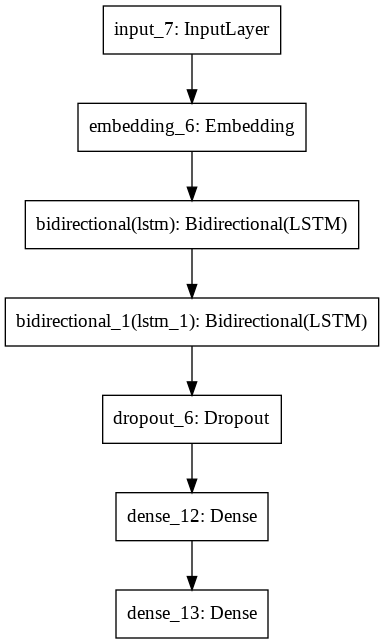

In [ ]:
embedding_dim = 4616

input = Input(embedding_dim,)
embedding = Embedding(vocab_size, embedding_dim, input_length=maxlen)(input)
recurrent1 = Bidirectional(LSTM(64, return_sequences=True))(embedding)
recurrent2 = Bidirectional(LSTM(20, return_sequences=True))(recurrent1)
dropout = Dropout(0.2)(recurrent2)
dense1 = Dense(16, activation='relu')(dropout)
output = Dense(1, activation='sigmoid')(dense1)
rnn_model_2 = Model(inputs=input, outputs=output)

# summarize layers
print(rnn_model_2.summary())
# plot graph
plot_model(rnn_model_2, to_file='recurrent_neural_network.png')

In [ ]:
rnn_model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
rnn_history_2 = rnn_model_2.fit(x_for_train_padded, y_train,
                    epochs=5,
                    steps_per_epoch=5,
                    validation_data=(x_for_val_padded, y_val),
                    batch_size=10)

Epoch 1/5
5/5 [==============================] - 962s 195s/step - loss: 0.7449 - accuracy: 0.5309 - val_loss: 0.6987 - val_accuracy: 0.5067
Epoch 2/5
5/5 [==============================] - 928s 193s/step - loss: 0.6937 - accuracy: 0.5173 - val_loss: 0.6960 - val_accuracy: 0.4939
Epoch 3/5
5/5 [==============================] - 930s 191s/step - loss: 0.7141 - accuracy: 0.4767 - val_loss: 0.7021 - val_accuracy: 0.4942
Epoch 4/5
5/5 [==============================] - 883s 183s/step - loss: 0.7053 - accuracy: 0.4572 - val_loss: 0.6931 - val_accuracy: 0.5064
Epoch 5/5
5/5 [==============================] - 891s 185s/step - loss: 0.7002 - accuracy: 0.4443 - val_loss: 0.6931 - val_accuracy: 0.5063


Опять модели, скорее всего, не хватает сложности. Оставим этот челлендж для больших мощностей (:

# Conclusions

В этом ноутбуке испробованы сверточные и рекуррентные сети, написанные в функциональном стиле. Еще использованы дропауты, разные функции активации, пулинги. Недостаточно сложная модель № 3 показала качество в 0.83.